
<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
# **Práctico de Aprendizaje Supervisado**



Importamos las librerías necesarias:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For the regression part
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

# For the classification part
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, KernelPCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.manifold import SpectralEmbedding


#sns.set_context('talk')
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")


En este práctico, utilizaremos el archivo original *fiji_datos_0al7mo_labels.csv* que se encuentra en la carpeta *data/raw/*.

Además sumaremos los siguientes datos sintéticos que se encuentran en la carpeta *data/datos_sinteticos/*:
  * datos_sinteticos_dias_3_y_5.csv
  * synthetic_3y5_sint2.csv
  * synthetic_data_dia_3_si.csv
  * synthetic_data_dia_4_si.csv
  * synthetic_data_dia_5_si.csv

Como también dos archivos extras que están en la capeta *data/03_AS/*:
  * fiji_datos_mean_diam.csv
  * fiji_datos_noise.csv
  

## Regresión

$1.$   Utilizando del día 1 al 5 los datos clasificados como 'Esferoide' = 'si', realizar un ajuste del diámetro medio. Sean los datos reales *mean_diam_df* y la señal ruidosa *df_noise*.


In [2]:
mean_diam_df = pd.read_csv("data/03_AS/fiji_datos_mean_diam.csv")
mean_diam_df

,dia,mean
0,0,23.145003
1,1,31.781506
2,2,60.685558
3,3,101.092311
4,4,89.688273
5,5,110.212304


In [3]:
df_noise = pd.read_csv("data/03_AS/fiji_datos_noise.csv")
df_noise

,dia,mean
0,0,23.288560
1,1,30.287199
2,2,67.158238
3,3,122.369407
4,4,120.851605
5,5,110.141722
6,0,14.068722
7,1,38.645930
8,2,63.240382
9,3,104.866656


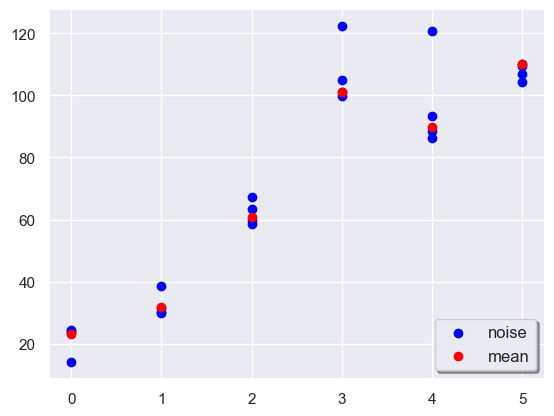

In [4]:
X_noise = df_noise['dia']
y_noise = df_noise['mean']
X_noise = np.array(X_noise.to_list())
y_noise = np.array(y_noise.to_list())

X_mean = mean_diam_df['dia']
y_mean = mean_diam_df['mean']
X_mean = np.array(X_mean.to_list())
y_mean = np.array(y_mean.to_list())


plt.scatter(X_noise, y_noise, color="blue", label="noise")
plt.scatter(X_mean, y_mean, color="red", label="mean")

legend = plt.legend(loc='lower right', shadow=True, fontsize='medium')

# Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('C9')


plt.show()

## Probar un ajuste lineal, polinomial, probar el ajuste "óptimo" que da el menor error cuadrático y sobreajuste.  

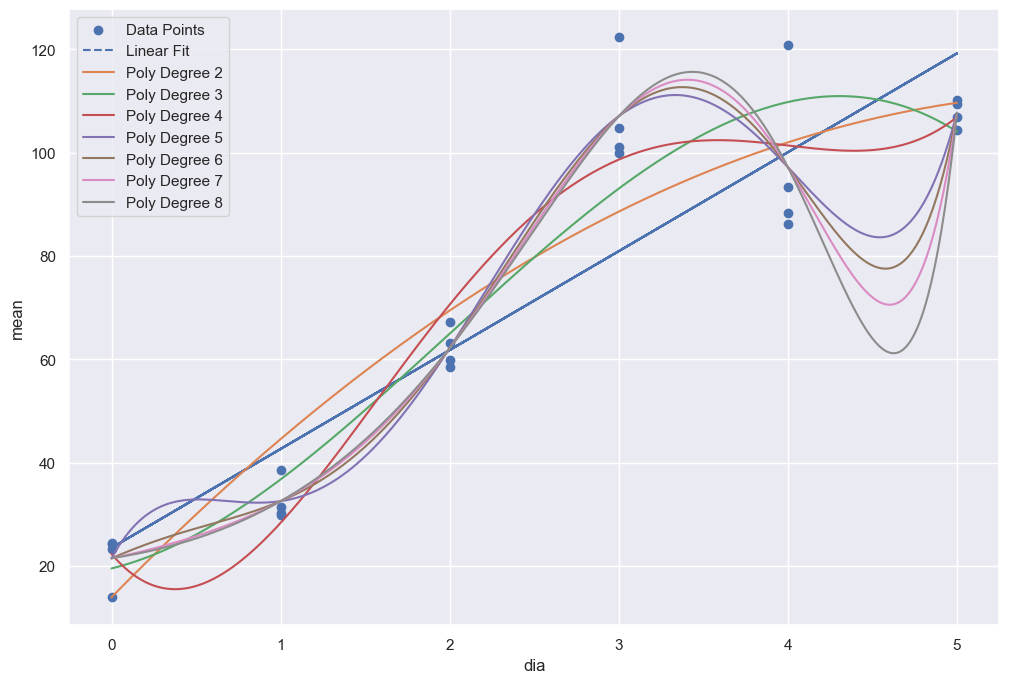

Linear - MSE: 208.57270812882277, R2: 0.8368330514664313
Poly_2 - MSE: 157.29561113119613, R2: 0.8769472520338177
Poly_3 - MSE: 119.94671373935535, R2: 0.9061653873938671
Poly_4 - MSE: 83.24985961412416, R2: 0.9348734276840532
Poly_5 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_6 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_7 - MSE: 53.59041940266886, R2: 0.9580760815592092
Poly_8 - MSE: 53.59041940266886, R2: 0.9580760815592092
Best Model: Poly_5 with R2 = 0.9580760815592092


In [5]:
# DataFrame to use; check that we are supposed to use this one!
diam_df = df_noise

# Extract data
X = diam_df[['dia']]
y = diam_df['mean']

# Linear regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)

# Evaluate linear model
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

# Store evaluation metrics and models for comparison
model_metrics = {'Linear': {'model': lin_model, 'mse': mse_lin, 'r2': r2_lin}}
best_model = {'name': 'Linear', 'r2': r2_lin}

# Polynomial regression (from degree 2 to n)
max_degree = 8  # change this to try out different maximum degrees
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    # Evaluate polynomial model
    mse_poly = mean_squared_error(y, y_pred_poly)
    r2_poly = r2_score(y, y_pred_poly)

    model_name = f'Poly_{degree}'
    model_metrics[model_name] = {'model': poly_model, 'mse': mse_poly, 'r2': r2_poly}

    # Update best model if needed
    if r2_poly > best_model['r2']:
        best_model = {'name': model_name, 'r2': r2_poly}

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred_lin, label='Linear Fit', linestyle='--')

# Plot polynomial fits
x_range = np.linspace(min(X.values), max(X.values), 500).reshape(-1, 1)
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly_range = poly.fit_transform(x_range)
    y_poly_range = model_metrics[f'Poly_{degree}']['model'].predict(X_poly_range)
    plt.plot(x_range, y_poly_range, label=f'Poly Degree {degree}')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()

# Print evaluation metrics
for model, metrics in model_metrics.items():
    print(f"{model} - MSE: {metrics['mse']}, R2: {metrics['r2']}")

print(f"Best Model: {best_model['name']} with R2 = {best_model['r2']}")


De esto, parece que el mejor modelo termina siendo el de grado 5. Revisemos esto usando un criterio que penalice de manera directa el añadir complejidad. Usemos el [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) para elegir. 

Nota: no uso BIC porque no creo que el modelo “real” esté siendo considerado.

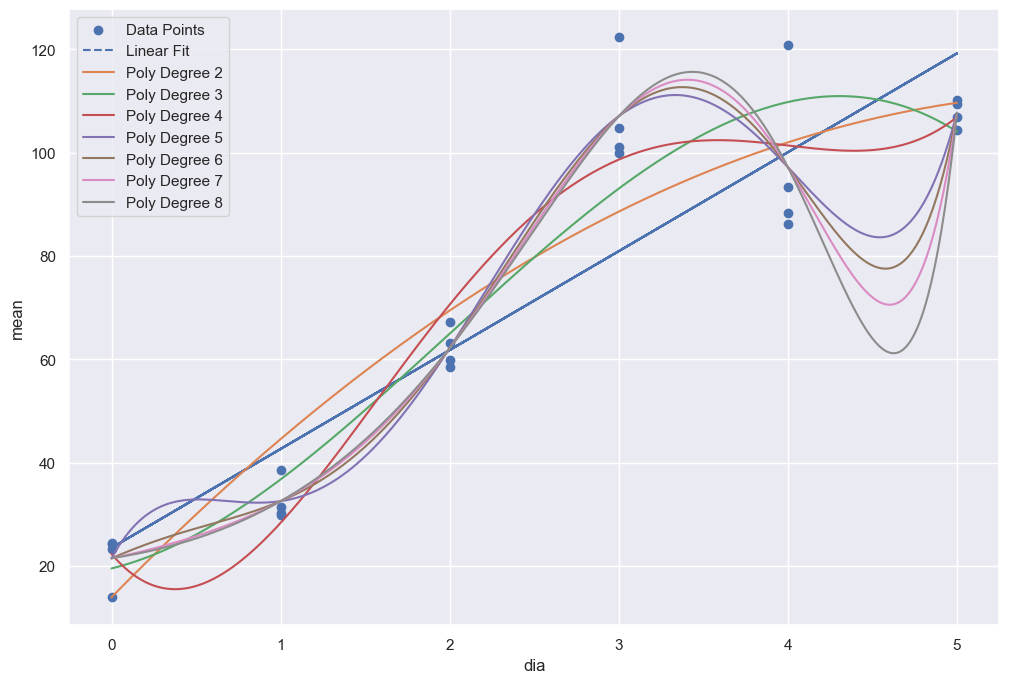

Linear - MSE: 208.57270812882277, AIC: 55.89361288346856
Poly_2 - MSE: 157.29561113119613, AIC: 51.1217538735165
Poly_3 - MSE: 119.94671373935535, AIC: 46.61585027940079
Poly_4 - MSE: 83.24985961412416, AIC: 39.851022692664614
Poly_5 - MSE: 53.59041940266886, AIC: 31.27959550235873
Poly_6 - MSE: 53.59041940266886, AIC: 33.27959550235873
Poly_7 - MSE: 53.59041940266886, AIC: 35.27959550235873
Poly_8 - MSE: 53.59041940266886, AIC: 37.27959550235873
Best Model: Poly_5 with AIC = 31.27959550235873


In [6]:
# DataFrame to use; check that we are supposed to use this one!
diam_df = df_noise

# Extract data
X = diam_df[['dia']]
y = diam_df['mean']
n = len(y)

# Function to calculate AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse / n) + 2 * num_params
    return aic

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)
y_pred_lin = lin_model.predict(X)
mse_lin = mean_squared_error(y, y_pred_lin)
aic_lin = calculate_aic(n, mse_lin, 2)  # 2 parameters: intercept and slope

# Store for comparison
model_metrics = {'Linear': {'model': lin_model, 'mse': mse_lin, 'aic': aic_lin}}
best_model = {'name': 'Linear', 'aic': aic_lin}

# Polynomial Regression (from degree 2 to n)
max_degree = 8  # Change this to try different maximum degrees
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)
    mse_poly = mean_squared_error(y, y_pred_poly)
    aic_poly = calculate_aic(n, mse_poly, degree + 1)  # degree+1 parameters

    model_name = f'Poly_{degree}'
    model_metrics[model_name] = {'model': poly_model, 'mse': mse_poly, 'aic': aic_poly}

    # Update best model if needed
    if aic_poly < best_model['aic']:
        best_model = {'name': model_name, 'aic': aic_poly}

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred_lin, label='Linear Fit', linestyle='--')

# Plot polynomial fits
x_range = np.linspace(min(X.values), max(X.values), 500).reshape(-1, 1)
for degree in range(2, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly_range = poly.fit_transform(x_range)
    y_poly_range = model_metrics[f'Poly_{degree}']['model'].predict(X_poly_range)
    plt.plot(x_range, y_poly_range, label=f'Poly Degree {degree}')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()

# Print evaluation metrics
for model, metrics in model_metrics.items():
    print(f"{model} - MSE: {metrics['mse']}, AIC: {metrics['aic']}")

print(f"Best Model: {best_model['name']} with AIC = {best_model['aic']}")


Ambos criterios coinciden en que el mejor ajuste polinomial es el de grado 5. Grafiquemos el resultado, incluyendo los puntos de `mean_diam_df`.

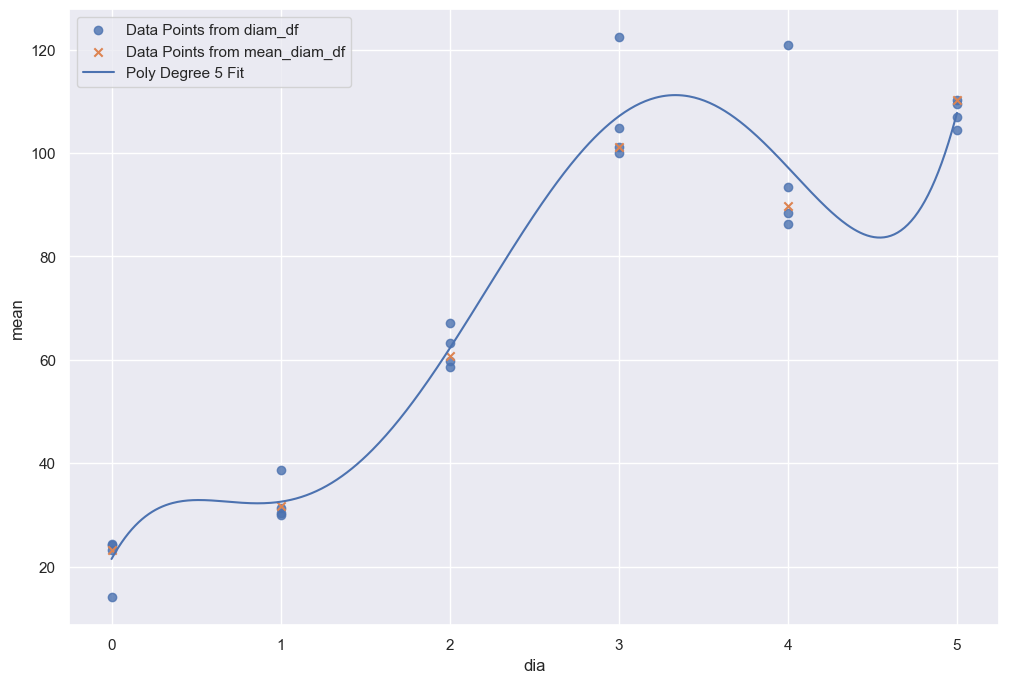

In [7]:
# (previous code for fitting models is required)

# Extract data from mean_diam_df
X_mean = mean_diam_df[['dia']]
y_mean = mean_diam_df['mean']

# Plotting
plt.figure(figsize=(12, 8))

# Plot data points from diam_df
plt.scatter(X, y, label='Data Points from diam_df', marker='o', alpha=0.8)

# Plot data points from mean_diam_df
plt.scatter(X_mean, y_mean, label='Data Points from mean_diam_df', marker='x', alpha=1.0)

# Plot polynomial fit of degree 5
poly_5 = PolynomialFeatures(degree=5)
X_poly_5_range = poly_5.fit_transform(x_range)
y_poly_5_range = model_metrics['Poly_5']['model'].predict(X_poly_5_range)
plt.plot(x_range, y_poly_5_range, label='Poly Degree 5 Fit', linestyle='-')

plt.xlabel('dia')
plt.ylabel('mean')
plt.legend()
plt.show()


## Clasificación

Aquí vamos a usar el dataset sin modificar, que se encuentra en 'raw/fiji_datos_0al7mo_labels.csv', en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link).

1) Teniendo en cuenta la naturaleza de nuestros datos, es adecuado plantearlo como un problema supervisado? De qué tipo? Justificar.
   
2) El dataset que tenemos, es linealmente separable?

3) Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del [repositorio](https://github.com/luciabarg/datos_tumoresferas/tree/main/data/datos_sinteticos) y de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link):

4) Elegir una de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):

  * Tomar todo el dataset.

  * Realizar clasificación sólo con los datos del día 3, 4 y 5.

  * Tomar solo los días 3, 4 y 5, y sumar los datos sintéticos.
  
  * Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5, con o sin datos sintéticos) pero indicar cuál se tomó.

\
**Elegir un escenario**, recordar eliminar una de las columnas altamente correlacionadas y también aquellas que no suman al problema. Si hubiera una columna constante, también deberían excluirla. Separen en conjuntos de entrenamiento y test, hacer tratamiento de ouliers, agregar columnas preprocesadas al original como algunas que sean combinaciones/modificaciones de las demás, multiplicaciones, logaritmos, potencias, [por ej](https://docs.google.com/presentation/d/e/2PACX-1vSLfKgsq-NuF2aWQF3OPkgLvBn25A2khGh0QIJkpFb6QgRZ7dGne32GEkTiC4M6yg/pub?start=false&loop=false&delayms=3000&slide=id.gb81ac3e375_0_32), verificando que no sean correlacionadas con las que ya tienen.


**Recordar que las transformaciones se realizan sobre el conjunto de train y luego se ajusta el de test**. Si hacen todo antes y luego separan, puede haber traspaso de información sobre el conjunto de train al test (*data leakage*).


Realizar un EDA rápido de como quedaron las variables y si la distribuciones en test son similares a las que tienen en train.
En todos los casos, tanto para train y test, visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.

Tenemos pocos datos, es muy posible que se genere overfitting. Cómo podrían tratar de solventar este inconveniente? Implementar si es posible.

Implementar sobre los conjuntos *test* y *train* del escenario elegido algún clasificador lineal como también probar DT, Random Forest y XGBoost.

Explorar con parámetros de defecto (modelo baseline) y con búsqueda de hiperparámetros y por medio de las diferentes métricas (sobre todo f1 y precision) determinar cuál es el mejor algoritmo de clasificación.
En los algoritmos que lo permitan, hacer listado de importancia de features y probar con diferentes combinaciones de columnas si la métrica hallada mejora si se disminuye la cantidad de columnas (puede ser que esto no ocurra también).

Con el algoritmo que tenga las mejores métricas , probar si mejora o empeoran la clasificación probando algún otro escenario (con todos los pasos que implica).

\
OPCIONAL:


Probar la métrica: coeficiente de correlación de [Matthews](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7) (está implementado en sklearn como una métrica más: *from sklearn.metrics import matthews_corrcoef* )

Si se animan, tenemos 5 días. Probar clasificación multiclase para identificar a q día se corresponden las muestras. O tomar solo los 3 que usaron en los escenarios anteriores.

Super buenas prácticas en este [repositorio](https://github.com/daianadte/wids-cba-2023/), es muy instructivo chusmear sobre todo el archivo  ['06_FinalModel.ipynb'](https://github.com/daianadte/wids-cba-2023/blob/main/06_FinalModel.ipynb) solo para que vean un análisis posterior a implementar los modelos y que existen los Shap Values, que es una técnica utilizada para explicar las predicciones.


----
Como este es el último práctico, si se animan, podrían implementar clústering.
Pueden implementar kmeans sobre el dataset normalizado, usando PCA, o incluso animarse a probar t-SNE y UMAP.

Realizar EDA sobre los conjuntos que encontraron y traten de explicarlos.

Muchas veces en problemas de negocios, no es tan importante el modelo en sí, qué tan bien separa los datos sino la interpretabilidad que se puede dar a los resultados. Podríamos coordinar con Luciano para charlar si lo que encontraron a partir de las agrupaciones, es coherente o no, sería como parte de charlar con el "cliente" a ver si está de acuerdo a lo hallado. O sea, pueden encontrar explicaciones a los datos distintos que la de "esferoides".


## 1. ¿Problema Supervisado?

Consigna: teniendo en cuenta la naturaleza de nuestros datos, ¿es adecuado plantearlo como un problema supervisado? ¿De qué tipo? Justificar.

Respuesta: depende de cuál sea nuestro objetivo. Hay objetivos que podemos definir, bajo los cuales podemos plantear problemas de clasificación. Por ejemplo:
- Generar un modelo que clasifique en esferoide 'si' o 'no'
- Generar un modelo que clasifique los agregados según los días de cultivo que llevan
- Una combinación de los anteriores.

Si bien optamos por elegir plantear el problema del primer ejemplo, cabe destacar que podríamos plantearlo como un problema de otro tipo si quisiéramos. Por ejemplo, podríamos intentar identificar distintos tipos de agregados que no forman esferoides, con la esperanza de identificar la causa de que no lo sean. Este problema, requeriría identificar grupos dentro de los esferoides 'no', por lo que correspondería a un problema no supervisado.


In [8]:
raw_df = pd.read_csv("data/raw/fiji_datos_0al7mo_labels.csv")
raw_df

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,1129.2718,102.2051,1129.2718,102.2051,67.3603,1118.8859,92.3913,21.0598,...,157,23.4287,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,1517.5528,126.1022,1517.5528,126.1022,82.8004,1504.7554,113.4511,25.8152,...,192,16.1443,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,1314.2815,126.0988,1314.2815,126.0988,62.1586,1304.3478,116.8478,19.7011,...,189,15.4222,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,1189.2841,212.6155,1189.2841,212.6155,84.5571,1175.9511,200.4076,26.4946,...,309,174.1440,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,1043.0782,247.7667,1043.0782,247.7667,82.0728,1030.5707,235.7337,25.1359,...,353,143.4270,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,539.0477,534.6299,153.9304,534.6299,153.9304,87.0414,521.7391,139.2663,25.1359,...,205,105.9454,25.1359,1.1762,0.8502,0.9570,no,7,27.40515,3.335248
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,277.8311,195.4265,433.4826,195.4265,433.4826,62.5566,185.4620,424.5924,18.3424,...,627,128.6598,18.1132,1.2288,0.8138,0.9473,no,7,19.93145,1.283064
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,531.2020,58.4620,261.9482,58.4620,261.9482,89.5939,44.8370,248.6413,26.4946,...,399,34.3803,24.9780,1.2569,0.7956,0.9350,no,7,28.12875,3.606474


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   labels      1018 non-null   object 
 1   Area        1018 non-null   float64
 2   X           1018 non-null   float64
 3   Y           1018 non-null   float64
 4   XM          1018 non-null   float64
 5   YM          1018 non-null   float64
 6   Perim.      1018 non-null   float64
 7   BX          1018 non-null   float64
 8   BY          1018 non-null   float64
 9   Width       1018 non-null   float64
 10  Height      1018 non-null   float64
 11  Circ.       1018 non-null   float64
 12  Feret       1018 non-null   float64
 13  FeretX      1018 non-null   int64  
 14  FeretY      1018 non-null   int64  
 15  FeretAngle  1018 non-null   float64
 16  MinFeret    1018 non-null   float64
 17  AR          1018 non-null   float64
 18  Round       1018 non-null   float64
 19  Solidity    1018 non-null  

Por el resultado del info, es el mismo `DataFrame` del primer entregable. Podemos reutilizar algunas cosas del análisis de ese momento, agregando algo de embeddings y clustering para revisar si los outliers tienen alguna estructura.

**Sobre la selección de columnas**

No selecciono width ni height porque son un poco redundantes dado lo demás. Tampoco FeretAngle, porque tiene que ver con la orientación de la foto, ni la razón de aspecto (AR), pues es función de Round. El área convexa (en solidity) tiene una información similar a circ y round (podría hacer LDA con estas y quedarme con algunas componentes). El diámetro es el promedio entre el Feret y el MinFeret (máxima y mínima distancia entre puntos del agregado), por lo que es LD con estos. A su vez, el número de céulas es una función del diámetro.

In [10]:
selected_cols = [
    "labels",
    "dia",
    "Area",
    "Perim.",
    # "Width",
    # "Height",
    "Feret",
    # "FeretAngle",
    "MinFeret",
    # "AR",
    "Circ.",
    "Round",
    "Solidity",
    "Esferoide",
    # "Diameter",
    # "n_diam",
]

df = raw_df[selected_cols]
df

,labels,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity,Esferoide
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,0,324.4440,67.3603,22.2117,19.7011,0.8985,0.9387,0.9500,si
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,0,497.5115,82.8004,26.8751,25.1289,0.9119,0.9546,0.9569,si
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,0,282.9078,62.1586,20.4370,18.3424,0.9201,0.9620,0.9519,si
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,0,500.7421,84.5571,26.6336,25.1359,0.8801,0.9730,0.9493,si
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,0,492.8964,82.0728,26.2232,24.4565,0.9195,0.9817,0.9643,si
...,...,...,...,...,...,...,...,...,...,...
1013,Esferas_BT474_dia_7_well_2_100X_5_blob_2,7,539.0477,87.0414,29.6744,25.1359,0.8941,0.8502,0.9570,no
1014,Esferas_BT474_dia_7_well_2_100X_5_blob_4,7,277.8311,62.5566,21.7497,18.1132,0.8922,0.8138,0.9473,no
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,7,435.6687,77.6671,27.0718,20.3804,0.9076,0.8018,0.9657,no
1016,Esferas_BT474_dia_7_well_2_100X_6_blob_3,7,531.2020,89.5939,31.2795,24.9780,0.8316,0.7956,0.9350,no


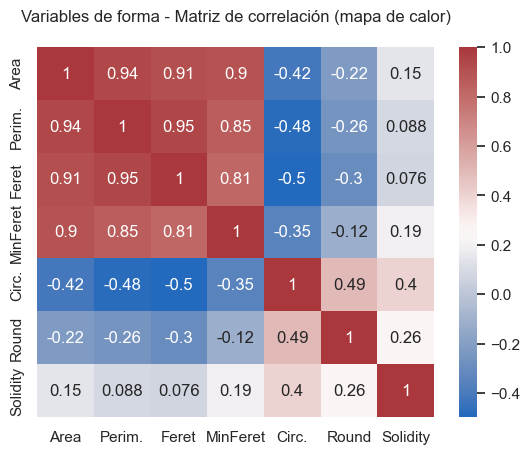

In [11]:
shape_cols = [
    "Area",
    "Perim.",
    "Feret",
    "MinFeret",
    "Circ.",
    "Round",
    "Solidity",
]

df_corr = df[shape_cols].dropna().corr(method='kendall')
sns.heatmap(df_corr, annot=True, cmap='vlag')
plt.title('Variables de forma - Matriz de correlación (mapa de calor)\n')
plt.show()

# Do this again separating by days

## 2. Separabilidad Lineal

Consigna: El dataset que tenemos, ¿es linealmente separable?.

Si el dataset es linealmente separable (tomando las categorías como esferoide 'si' y 'no'), un perceptrón simple tendría que lograr una clasificación perfecta.

In [12]:
df['Esferoide'].unique()

array(['si', 'no'], dtype=object)

In [13]:
# Map 'Esferoide' column to 1s and 0s
df['Esferoide'] = df['Esferoide'].map({'si': 1, 'no': 0})

# Separate features and labels
X = df.drop(['labels', 'Esferoide'], axis=1)
y = df['Esferoide']

# Split the data into training and testing sets
# X_train_percep, X_test_percep, y_train_percep, y_test_percep = train_test_split(X, y, test_size=0.2, random_state=42)
# We don't do the former since we just want the perceptron to score perfect for this data set
X_train_percep = X
y_train_percep = y

# Scale the features
scaler = StandardScaler()
X_train_percep = scaler.fit_transform(X_train_percep)
# X_test_percep = scaler.transform(X_test_percep)

# Initialize and train the perceptron model
clf = Perceptron(max_iter=2000, tol=1e-4, random_state=42)
clf.fit(X_train_percep, y_train_percep)

# Make predictions and evaluate accuracy
y_pred_train_percep = clf.predict(X_train_percep)
# y_pred_test_percep = clf.predict(X_test_percep)

accuracy_train = accuracy_score(y_train_percep, y_pred_train_percep)
# accuracy_test = accuracy_score(y_test_percep, y_pred_test_percep)

print(f"Training accuracy: {accuracy_train}")
# print(f"Test accuracy: {accuracy_test}")

# Determine linear separability
if accuracy_train == 1.0 and accuracy_test == 1.0:
    print("The data is linearly separable.")
else:
    print("The data is not linearly separable.")


Training accuracy: 0.6434184675834971
The data is not linearly separable.


Como podemos ver, el dataset no es linealmente separable por mucho.

## 3. Datos Sintéticos

Consigna: Explorar las características de los datos sintéticos generados, comparar con los datos que tenemos de los días 3,4 y 5. Los datos se encuentran en la carpeta del repositorio y de la carpeta compartida.

In [14]:
#...

## 4. Clasificación

**Consigna:** 

Elegir uno de las siguientes situaciones y generar su correspondiente dataset (leer hasta el final del enunciado antes de generarlos):

* Tomar todo el dataset.

* Realizar clasificación con solo los datos del día 3, 4 y 5.

* Tomar solo los días 3,4 y 5 y sumar los datos sintéticos.
  
* Utilizando sólo PCA (si quieren de todos días o solo de los días 3,4 y 5, con o sin datos sintéticos) pero indicar cuál se tomó.

---

Vamos a tomar todo el dataset (datos originales hasta el día 5) para generar la clasificación en esferoide 'si' y 'no'.

### 4.1 Situación: Días previos al 5

Eliminamos las filas que corresponden a días posteriores al quinto.

In [62]:
# X.loc[X['dia']<6]['dia'].unique()
df_5 = df.loc[df['dia']<6]
df_5

,labels,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity,Esferoide
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,0,324.4440,67.3603,22.2117,19.7011,0.8985,0.9387,0.9500,1
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,0,497.5115,82.8004,26.8751,25.1289,0.9119,0.9546,0.9569,1
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,0,282.9078,62.1586,20.4370,18.3424,0.9201,0.9620,0.9519,1
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,0,500.7421,84.5571,26.6336,25.1359,0.8801,0.9730,0.9493,1
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,0,492.8964,82.0728,26.2232,24.4565,0.9195,0.9817,0.9643,1
...,...,...,...,...,...,...,...,...,...,...
935,Esferas_BT474_dia_5_well_1_100X_2_blob_8,5,1011.1760,118.7176,38.1041,35.0171,0.9016,0.9225,0.9673,0
936,Esferas_BT474_dia_5_well_1_100X_2_blob_9,5,902.7203,117.4272,41.0373,28.3419,0.8227,0.6620,0.9534,0
937,Esferas_BT474_dia_5_well_1_100X_4_blob_5,5,400.1322,75.4442,24.2481,22.4822,0.8834,0.9506,0.9507,0
938,Esferas_BT474_dia_5_well_2_100X_7_blob_1,5,1224.8567,155.5955,52.5606,35.9582,0.6358,0.6909,0.8911,0


In [63]:
# Separate features and labels
X = df_5.drop(['labels', 'Esferoide'], axis=1)
y = df_5['Esferoide']

### 4.2 Separación en Conjuntos de Entrenamiento y Evaluación

In [64]:
# We stratify according to the number of tumorspheres in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 42, stratify=y)

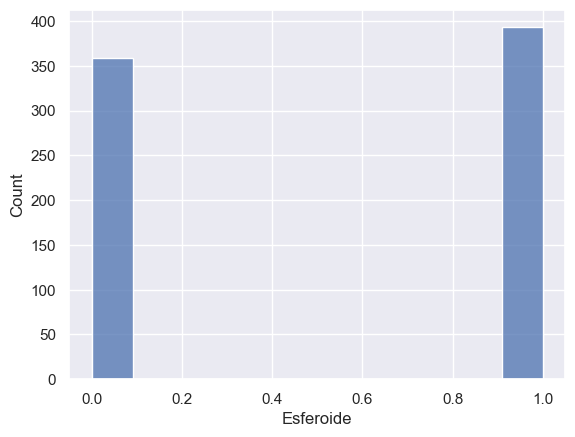

In [65]:
sns.histplot(data=y_train)
plt.show()

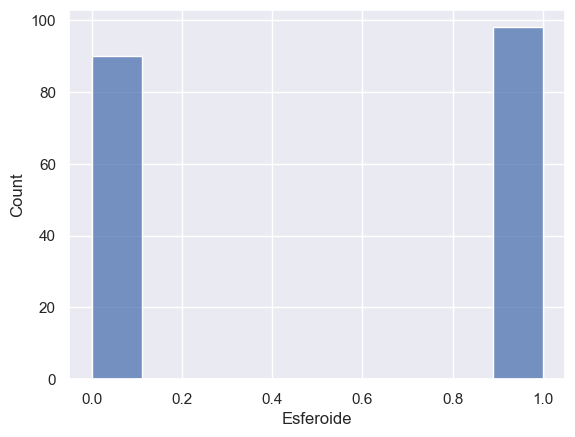

In [66]:
sns.histplot(data=y_test)
plt.show()

Como podemos ver, la separación se hizo respetando las proporciones de esferoide 'si' y 'no'.

### 4.3 Pre-procesamiento

#### 4.3.1 Outliers

Contamos el número de outliers en cada feature. Si supera el 10% de los datos, usamos RobustScaler en lugar de StandardScaler. No lo hago por día porque quiero que el scaling para la misma característica, para dos días diferentes, sea el mismo.

In [67]:
def outlier_counter(series_data):
    '''Returns the number of outliers in a pandas.Series.
    '''
    # Calculate Q1, Q3 and IQR
    Q1 = series_data.quantile(0.25)
    Q3 = series_data.quantile(0.75)
    IQR = Q3 - Q1

    # Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and count outliers
    outlier_count = ((series_data < lower_bound) | (series_data > upper_bound)).sum()
    return outlier_count

In [68]:
for_std_scaler = []
for_robust_scaler = []

for col in X_train.columns:
    # Count outliers
    outlier_count = outlier_counter(X_train[col])
    
    # We assign each column to the list of the scaler to use
    if outlier_count >= (0.1*X_train.shape[0]):
        for_robust_scaler.append(col)
    else:
        for_std_scaler.append(col)

print(for_robust_scaler)

# we remove 'dia' from the std list
# (it's already ordinaly encoded)
for_std_scaler.remove('dia')
print(for_std_scaler)

['Area', 'Perim.', 'MinFeret', 'Solidity']
['Feret', 'Circ.', 'Round']


In [69]:
# We create the Scaler objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# fit_transform only on numerical columns
X_train[for_std_scaler] = std_scaler.fit_transform(X_train[for_std_scaler])
X_train[for_robust_scaler] = rob_scaler.fit_transform(X_train[for_robust_scaler])

X_train

,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity
733,4,-0.459249,-0.579099,-0.750843,-0.549139,0.843645,0.571290,0.056373
553,2,-0.430880,-0.549965,-0.749904,-0.463274,1.033313,0.899020,0.159314
595,3,1.936752,1.787799,0.936701,1.377972,-2.576525,-1.588497,-3.507353
360,1,-0.003953,-0.027558,-0.331354,0.051919,0.120857,0.050156,-0.183824
555,2,-0.240670,-0.302214,-0.534920,-0.270043,0.638599,-0.010327,0.012255
...,...,...,...,...,...,...,...,...
88,0,-0.036972,0.162849,-0.184605,-0.324279,-2.056733,-2.200355,-3.164216
161,1,-0.302523,-0.364940,-0.586842,-0.389119,0.536076,-0.161533,-0.139706
901,5,13.687943,6.391308,3.703761,6.524559,-3.074787,0.188703,-2.375000
218,1,0.064411,0.046313,-0.212342,-0.100638,-0.010372,-1.185515,-0.443627


Repetimos para los datos de test

In [70]:
for col in X_test.columns:
    # Count outliers
    outlier_count = outlier_counter(X_test[col])
    
    # We assign each column to the list of the scaler to use
    if outlier_count >= (0.1*X_test.shape[0]):
        for_robust_scaler.append(col)
    else:
        for_std_scaler.append(col)

print(for_robust_scaler)

# we remove 'dia' from the std list
# (it's already ordinaly encoded)
for_std_scaler.remove('dia')
print(for_std_scaler)

['Area', 'Perim.', 'MinFeret', 'Solidity', 'Area', 'Perim.', 'MinFeret']
['Feret', 'Circ.', 'Round', 'Feret', 'Circ.', 'Round', 'Solidity']


In [71]:
# We create the Scaler objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# fit_transform only on numerical columns
X_test[for_std_scaler] = std_scaler.fit_transform(X_test[for_std_scaler])
X_test[for_robust_scaler] = rob_scaler.fit_transform(X_test[for_robust_scaler])

X_test

,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity
239,1,-0.302287,-0.394208,-0.649607,-0.252227,0.824472,0.880326,0.128174
531,2,0.089526,0.066885,-0.221213,0.026433,0.005768,-1.260056,-0.012092
910,5,2.748167,1.627117,0.833600,2.278240,0.225896,0.123066,0.824667
743,4,-0.313670,-0.310189,-0.575992,-0.289794,-0.761970,0.755002,-1.951632
465,2,-0.119295,-0.138146,-0.380308,-0.272469,0.016612,-1.346643,-0.597340
...,...,...,...,...,...,...,...,...
699,4,-0.352632,-0.457997,-0.681248,-0.374288,0.859172,0.923620,0.268440
807,4,0.305790,0.301810,-0.030669,0.174462,-0.483286,-1.756795,-0.969770
163,1,-0.086462,-0.132861,-0.389340,-0.160993,0.410240,-0.949404,0.205562
119,1,-0.306227,-0.345367,-0.606883,-0.289794,-0.089657,0.815006,-0.660218


#### 4.3.2 Medidas de Esfericidad

Solidity, Round y Circ. contienen información que podría ser similar. Las opciones son no hacer nada, o probar quedarse con una o dos componentes de LDA.

In [72]:
# I'm going to try all options latter with the Pipeline,
# for now, I'll try an LDA with all variables in the next section.

#### 4.3.3 Medidas de Tamaño

Area, Perim., Feret y MinFeret, son medidas de tamaño con significados en principio diferentes. Sin embargo, podríamos probar haciendo PCA, LDA, o nada.

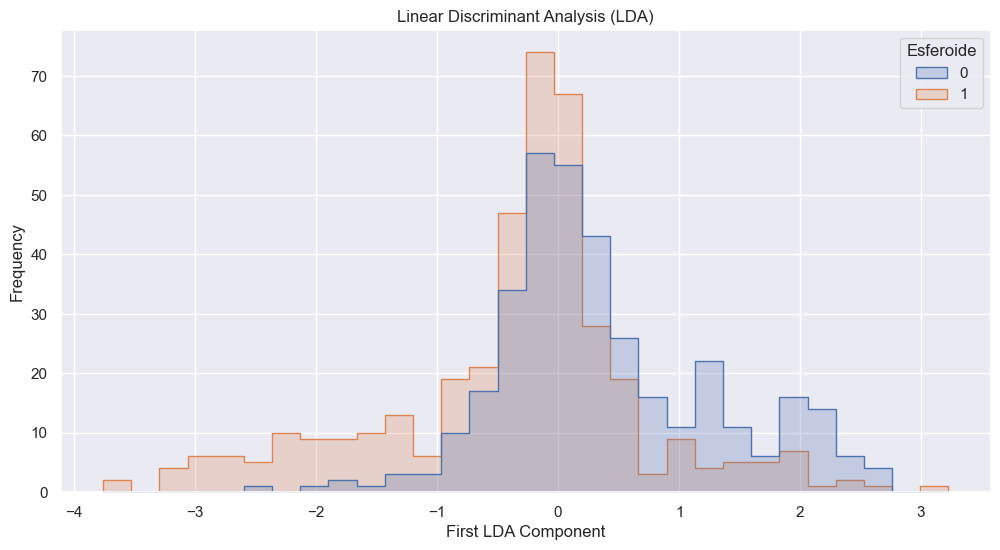

In [73]:
# Let's do here the LDA for all variables except day.
# However, let's try with a single component first:

# Drop the 'dia' column from X_pre
X_pre = X_train.drop(['dia'], axis=1)

# Perform LDA
lda_single_comp = LinearDiscriminantAnalysis(n_components=1)
X_lda_single_comp = lda_single_comp.fit_transform(X_pre, y_train)

# Convert to DataFrame for easier plotting
df_lda_single_comp = pd.DataFrame(data=X_lda_single_comp, columns=['First Component'])
df_lda_single_comp['Esferoide'] = y_train.reset_index(drop=True)  # Reset index to ensure alignment

# Plotting
plt.figure(figsize=(12, 6))

sns.histplot(data=df_lda_single_comp, x='First Component', hue='Esferoide', bins=30, element='step')
plt.xlabel('First LDA Component')
plt.ylabel('Frequency')
plt.title('Linear Discriminant Analysis (LDA)')
plt.show()


Notar que esto es otra prueba de la no separabilidad lineal de los datos. Dado que tenemos dos clases, si queremos más componentes tenemos que pasar a PCA o hacer LDA con subconjuntos de las variables. Por ahora, pasemos a ver si hay alguna forma de separar fácil usando todo. Las otras formas las probamos después en el grid search del pipeline.

Principal Components:
[[ 0.81762319  0.33301988  0.23690467  0.39677572 -0.07906316 -0.01338523
   0.02459952]
 [-0.07420623  0.08686897  0.08195937 -0.04341018 -0.51436972 -0.46537397
  -0.70512148]]


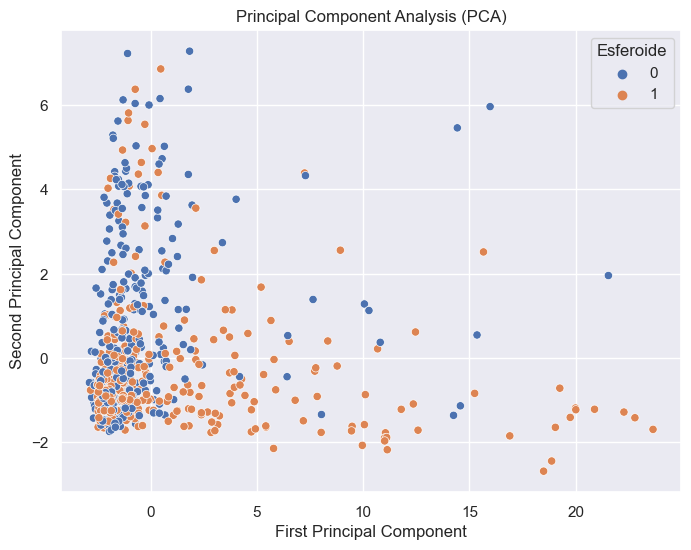

In [74]:
# Copy of X_pre
X_pre_filtered = X_pre

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pre_filtered)

# Accessing the components
print("Principal Components:")
print(pca.components_)

# Convert to DataFrame for easier plotting
df_pca = pd.DataFrame(data=X_pca, columns=['First Component', 'Second Component'])
df_pca['Esferoide'] = y_train.reset_index(drop=True)  # Reset index for proper alignment

# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x='First Component', y='Second Component', hue='Esferoide', data=df_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component Analysis (PCA)')
plt.grid(True)
plt.show()


Esto es parecido a lo que habíamos obtenido en el entregable de visualización. Veamos si usar algún kernel lo vuelve más separable (a ojo al menos).

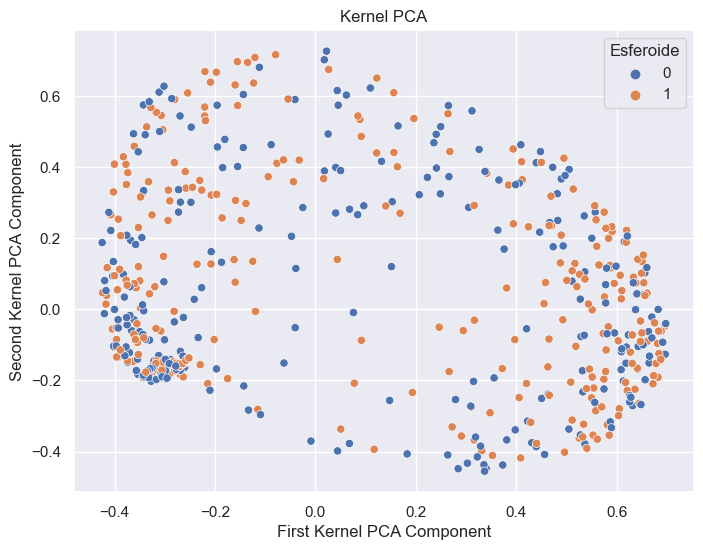

In [75]:
# Copy of X_pre
X_pre_filtered = X_pre

# Perform Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)
X_kpca = kpca.fit_transform(X_pre_filtered)

# Convert to DataFrame for easier plotting
df_kpca = pd.DataFrame(data=X_kpca, columns=['First Component', 'Second Component'])
df_kpca['Esferoide'] = y_train.reset_index(drop=True)  # Reset index for proper alignment

# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x='First Component', y='Second Component', hue='Esferoide', data=df_kpca)
plt.xlabel('First Kernel PCA Component')
plt.ylabel('Second Kernel PCA Component')
plt.title('Kernel PCA')
plt.grid(True)
plt.show()


### 4.4 Modelo

#### 4.4.1 Random Forest

Comencemos armando un baseline con un random forest sobre el dataset sin transformar.

In [76]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the training data
rf_clf.fit(X_train, y_train)

# Perform prediction on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importances
feature_importances = rf_clf.feature_importances_
feature_names = X_train.columns
print("\nFeature Importances:")
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance:.4f}")


Accuracy Score: 0.8404255319148937

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        90
           1       0.81      0.90      0.85        98

    accuracy                           0.84       188
   macro avg       0.84      0.84      0.84       188
weighted avg       0.84      0.84      0.84       188


Feature Importances:
dia: 0.3047
Area: 0.1033
Perim.: 0.0874
Feret: 0.0950
MinFeret: 0.1008
Circ.: 0.1041
Round: 0.1042
Solidity: 0.1005


Malísimo, es básicamente una moneda.

### ANS

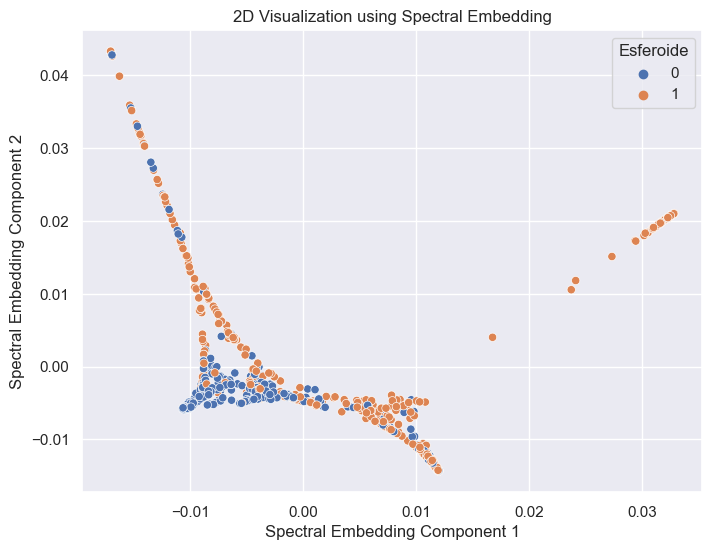

In [77]:
# Apply Spectral Embedding
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10)
X_transformed = embedding.fit_transform(X_train)

# Convert to DataFrame for easier plotting
df_transformed = pd.DataFrame(X_transformed, columns=['Component 1', 'Component 2'])
df_transformed['Esferoide'] = y_train.reset_index(drop=True)  # Reset index for alignment

# 2D Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='Esferoide', data=df_transformed)
plt.xlabel('Spectral Embedding Component 1')
plt.ylabel('Spectral Embedding Component 2')
plt.title('2D Visualization using Spectral Embedding')
plt.grid(True)
plt.show()


In [78]:
# Apply Spectral Embedding
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10)
X_transformed = embedding.fit_transform(X_train)

# Convert to DataFrame for easier plotting
df_transformed = pd.DataFrame(X_transformed, columns=['Component 1', 'Component 2'])
df_transformed['dia'] = X_train['dia'].reset_index(drop=True)  # Add 'dia' column after resetting index

# 2D Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Component 1', y='Component 2', hue='dia', palette='viridis', data=df_transformed)
plt.xlabel('Spectral Embedding Component 1')
plt.ylabel('Spectral Embedding Component 2')
plt.title('2D Visualization using Spectral Embedding')
plt.colorbar(label='dia')
plt.grid(True)
plt.show()


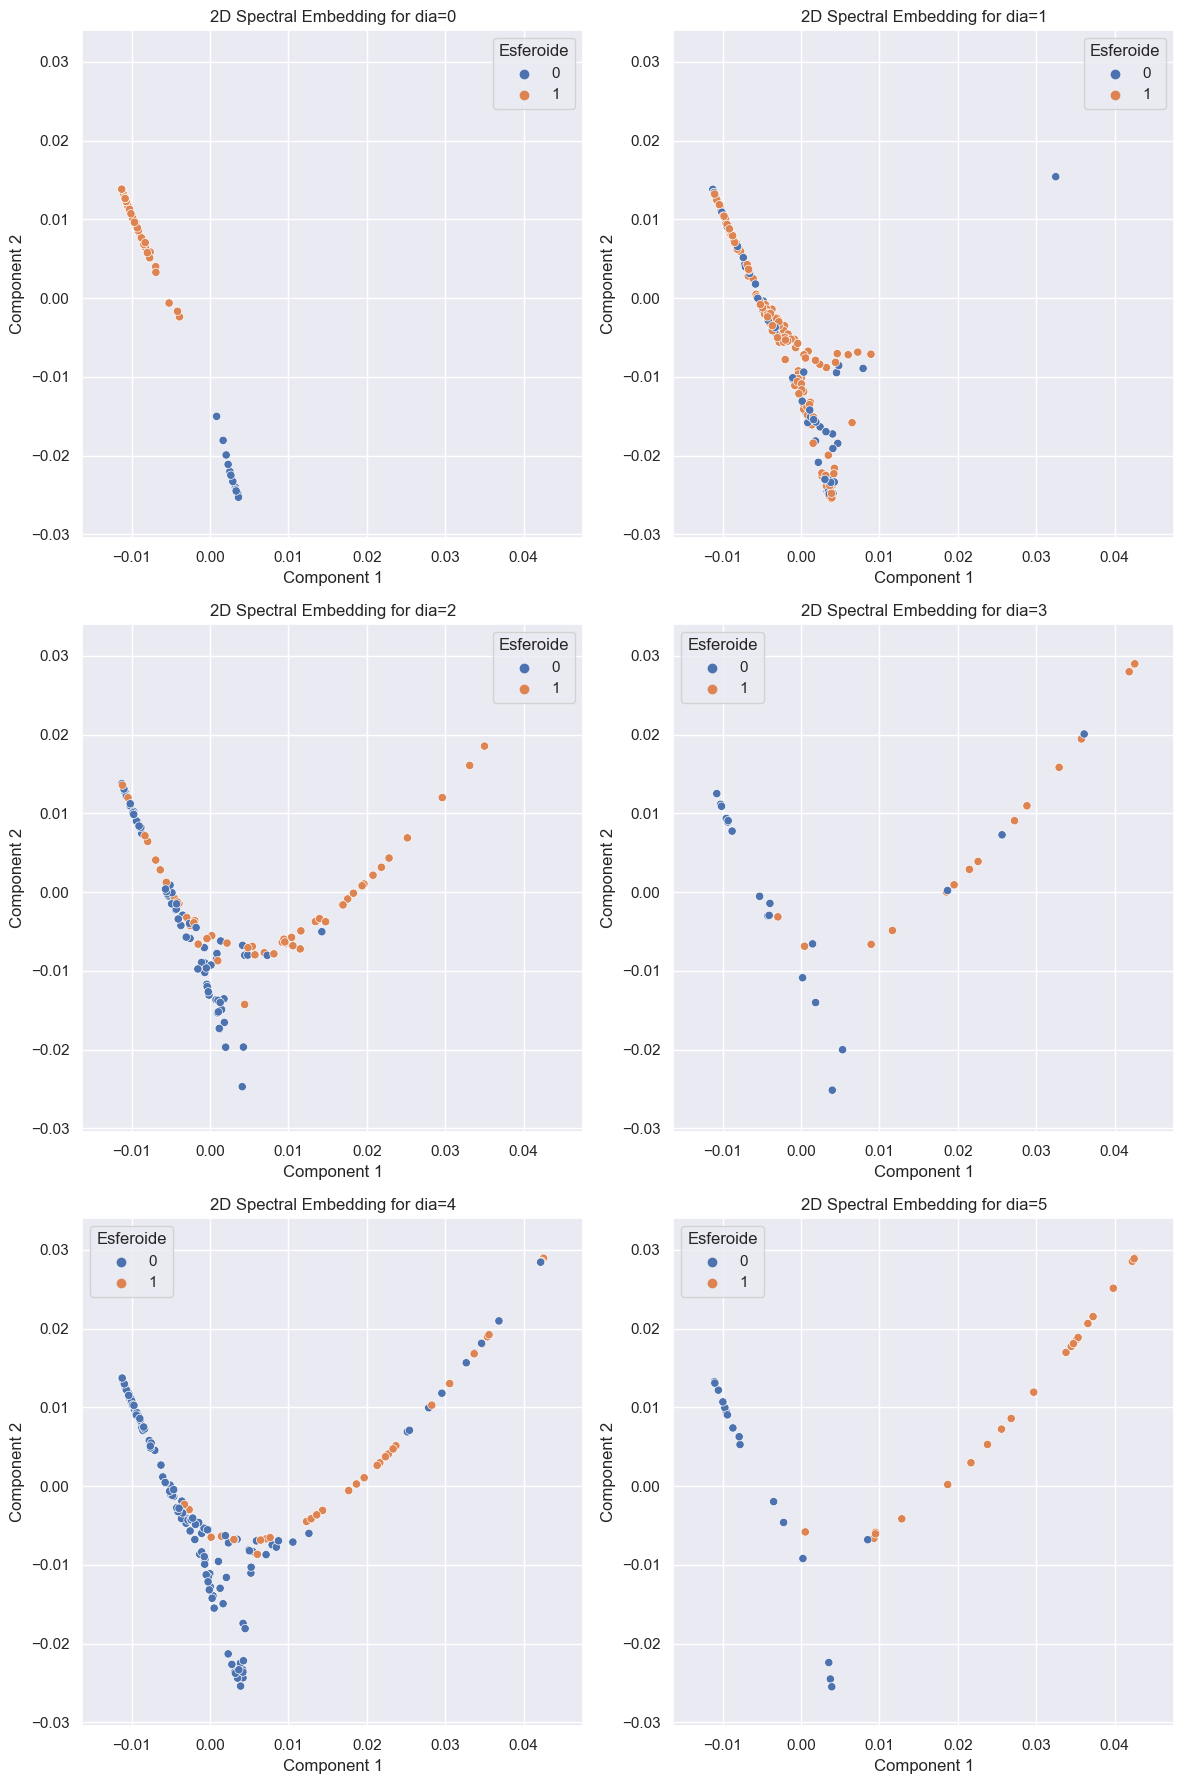

In [79]:
# Drop the 'dia' column from X_pre for Spectral Embedding
X_pre_filtered = X_train.drop(['dia'], axis=1)

# Apply Spectral Embedding
embedding = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10)
X_transformed = embedding.fit_transform(X_pre_filtered)

# Convert to DataFrame for easier plotting
df_transformed = pd.DataFrame(X_transformed, columns=['Component 1', 'Component 2'])
df_transformed['Esferoide'] = y_train.reset_index(drop=True)  # Add 'Esferoide' column after resetting index
df_transformed['dia'] = X_train['dia'].reset_index(drop=True)  # Add 'dia' column after resetting index

# Initialize plot
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Flatten axes for easier indexing
axes = axes.flatten()

# Determine the limits for the axes based on the transformed data
margin = 0.005
x_min, x_max = df_transformed['Component 1'].min()-margin, df_transformed['Component 1'].max()+margin
y_min, y_max = df_transformed['Component 2'].min()-margin, df_transformed['Component 2'].max()+margin

# Loop through each 'dia' value and plot
for i in range(6):
    subset = df_transformed[df_transformed['dia'] == i]
    sns.scatterplot(x='Component 1', y='Component 2', hue='Esferoide', data=subset, ax=axes[i])
    axes[i].set_title(f'2D Spectral Embedding for dia={i}')
    axes[i].grid(True)
    axes[i].set_xlim([x_min, x_max])
    axes[i].set_ylim([y_min, y_max])

plt.tight_layout()
plt.show()


In [ ]:
De aquí podemos ver que para los días 3, 4 y 5 los datos de esferoides son linealmente separables.

Exploremos el resulado de varios modelos.

In [82]:
clfs = [
    DecisionTreeClassifier(random_state= 1 ),
    RandomForestClassifier(random_state= 1),
    LogisticRegression(),
    MLPClassifier(random_state=1),
    XGBClassifier(random_state=1),
    GaussianNB(),
    LinearSVC(random_state=1)
]

names = ['Arbol de decisión',
         'Random Forest',
         'Regresión Logística',
         'Perceptrón multicapa',
         'XGBoost',
         'Naive Bayes',
         'SVM']

trained_models = []
accuracy_models = []

for clf, name in zip(clfs, names):
    print(name)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    accuracy_train = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy_train * 100.0))

    test_predictions = clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy_test * 100.0))

    trained_models.append(clf)
    accuracy_models.append(accuracy_test * 100)

Arbol de decisión
Accuracy train Arbol de decisión: 100.00%
Accuracy test Arbol de decisión: 79.79%
Random Forest
Accuracy train Random Forest: 100.00%
Accuracy test Random Forest: 83.51%
Regresión Logística
Accuracy train Regresión Logística: 83.38%
Accuracy test Regresión Logística: 82.45%
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 85.11%
Accuracy test Perceptrón multicapa: 84.04%
XGBoost
Accuracy train XGBoost: 100.00%
Accuracy test XGBoost: 82.45%
Naive Bayes
Accuracy train Naive Bayes: 75.00%
Accuracy test Naive Bayes: 73.40%
SVM
Accuracy train SVM: 83.11%
Accuracy test SVM: 82.45%


In [83]:
df_filter = df_5.copy()

df_filter= df.loc[df['dia']<6 | (df['dia'] > 1)]
df_filter.head()

,labels,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity,Esferoide
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,0,324.4440,67.3603,22.2117,19.7011,0.8985,0.9387,0.9500,1
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,0,497.5115,82.8004,26.8751,25.1289,0.9119,0.9546,0.9569,1
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,0,282.9078,62.1586,20.4370,18.3424,0.9201,0.9620,0.9519,1
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,0,500.7421,84.5571,26.6336,25.1359,0.8801,0.9730,0.9493,1
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,0,492.8964,82.0728,26.2232,24.4565,0.9195,0.9817,0.9643,1


In [84]:
# Separate features and labels
X2 = df_filter.drop(['labels', 'Esferoide'], axis=1)
y2 = df_filter['Esferoide']

In [85]:
# We stratify according to the number of tumorspheres in each set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, train_size=0.8, random_state = 42, stratify=y2)


In [86]:
for_std_scaler = []
for_robust_scaler = []

for col in X_train_2.columns:
    # Count outliers
    outlier_count = outlier_counter(X_train_2[col])
    
    # We assign each column to the list of the scaler to use
    if outlier_count >= (0.1*X_train_2.shape[0]):
        for_robust_scaler.append(col)
    else:
        for_std_scaler.append(col)

print(for_robust_scaler)

# we remove 'dia' from the std list
# (it's already ordinaly encoded)
for_std_scaler.remove('dia')
print(for_std_scaler)

['Circ.', 'Round', 'Solidity']
['Area', 'Perim.', 'Feret', 'MinFeret']


In [87]:
# We create the Scaler objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# fit_transform only on numerical columns
X_train_2[for_std_scaler] = std_scaler.fit_transform(X_train_2[for_std_scaler])
X_train_2[for_robust_scaler] = rob_scaler.fit_transform(X_train_2[for_robust_scaler])

X_train_2

,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity
7,0,-0.454605,-0.478948,-0.514123,-0.035064,0.026723,0.048549,-0.153846
29,0,-0.914062,-0.930191,-0.897253,-1.086791,0.158931,0.068680,0.363636
56,0,-0.666137,-0.700764,-0.745462,-0.362670,0.258790,0.505625,0.447552
19,0,0.430191,0.296761,0.075875,1.085573,-0.368495,0.285376,-0.076923
53,0,-0.647941,-0.664013,-0.694545,-0.400643,0.097046,0.310243,0.391608
...,...,...,...,...,...,...,...,...
51,0,-0.859473,-0.878219,-0.846148,-0.905774,0.184248,-0.048549,0.125874
8,0,-0.245347,-0.290729,-0.389203,0.297764,-0.025316,0.363529,-0.293706
67,0,-0.782139,-0.833853,-0.814868,-0.724730,0.455696,0.111308,0.748252
78,0,1.951859,2.187861,2.147111,0.904530,-3.706048,-5.105980,-3.692308


In [88]:
for_std_scaler = []
for_robust_scaler = []

for col in X_test_2.columns:
    # Count outliers
    outlier_count = outlier_counter(X_test_2[col])
    
    # We assign each column to the list of the scaler to use
    if outlier_count >= (0.1*X_test_2.shape[0]):
        for_robust_scaler.append(col)
    else:
        for_std_scaler.append(col)

print(for_robust_scaler)

# we remove 'dia' from the std list
# (it's already ordinaly encoded)
for_std_scaler.remove('dia')
print(for_std_scaler)

['Feret', 'Circ.', 'Round', 'Solidity']
['Area', 'Perim.', 'MinFeret']


In [89]:
# We create the Scaler objects
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# fit_transform only on numerical columns
X_test_2[for_std_scaler] = std_scaler.fit_transform(X_test_2[for_std_scaler])
X_test_2[for_robust_scaler] = rob_scaler.fit_transform(X_test_2[for_robust_scaler])

X_test_2.head()

,dia,Area,Perim.,Feret,MinFeret,Circ.,Round,Solidity
20,0,0.356030,0.141366,0.151032,0.937206,0.014164,-0.902589,0.477987
14,0,0.188834,-0.021441,-0.055271,0.937206,0.617564,0.660912,0.817610
84,0,1.101558,1.499726,1.477131,0.088396,-7.399433,-10.480888,-3.987421
88,0,1.633295,1.924108,1.884361,0.322234,-7.713881,-10.535142,-3.635220
27,0,0.229948,0.129796,0.173984,1.064546,-0.883853,0.818742,-0.685535


In [90]:
clfs = [
    DecisionTreeClassifier(random_state= 1 ),
    RandomForestClassifier(random_state= 1),
    LogisticRegression(),
    MLPClassifier(random_state=1),
    XGBClassifier(random_state=1),
    GaussianNB(),
    LinearSVC(random_state=1)
]

names = ['Arbol de decisión',
         'Random Forest',
         'Regresión Logística',
         'Perceptrón multicapa',
         'XGBoost',
         'Naive Bayes',
         'SVM']

trained_models = []
accuracy_models = []

for clf, name in zip(clfs, names):
    print(name)
    clf.fit(X_train_2, y_train_2)
    train_predictions = clf.predict(X_train_2)
    accuracy_train = accuracy_score(y_train_2, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy_train * 100.0))

    test_predictions = clf.predict(X_test_2)
    accuracy_test = accuracy_score(y_test_2, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy_test * 100.0))

    trained_models.append(clf)
    accuracy_models.append(accuracy_test * 100)

Arbol de decisión
Accuracy train Arbol de decisión: 100.00%
Accuracy test Arbol de decisión: 100.00%
Random Forest
Accuracy train Random Forest: 100.00%
Accuracy test Random Forest: 100.00%
Regresión Logística
Accuracy train Regresión Logística: 100.00%
Accuracy test Regresión Logística: 100.00%
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 100.00%
Accuracy test Perceptrón multicapa: 100.00%
XGBoost
Accuracy train XGBoost: 100.00%
Accuracy test XGBoost: 100.00%
Naive Bayes
Accuracy train Naive Bayes: 100.00%
Accuracy test Naive Bayes: 100.00%
SVM
Accuracy train SVM: 100.00%
Accuracy test SVM: 100.00%


 Dado que las acccura